In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

print("Path to dataset files:", path)

/home/agilecpu154/Documents/Task-8 Skin Cancer Detection/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/agilecpu154/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Input
from tensorflow.keras.callbacks import ModelCheckpoint

2025-01-31 11:54:34.550935: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 11:54:34.601784: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 11:54:34.631089: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738304674.660236   59431 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738304674.670043   59431 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 11:54:34.705842: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

1.) Importing Tabular Data

In [4]:
tabular_data = pd.read_csv(r'/home/agilecpu154/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2/HAM10000_metadata.csv')

print(tabular_data.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


Importing Data Images with Pixel Values and Labels

In [5]:
data = pd.read_csv('/home/agilecpu154/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2/hmnist_28_28_RGB.csv')

Splitting Data into Features(x) and Labels(y)

In [6]:
x = data.drop('label', axis=1)
y = data['label']

OverSampling to Overcome Class Imbalance

In [7]:
oversample = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversample.fit_resample(x, y)

Reshaping x to match image dimensions(28,28,3)

In [8]:
x_resampled = np.array(x_resampled).reshape(-1, 28, 28, 3)

print('Shape of x after oversampling and reshaping:', x_resampled.shape)

Shape of x after oversampling and reshaping: (46935, 28, 28, 3)


Standardizing Data

In [9]:
mean = np.mean(x_resampled)
std = np.std(x_resampled)
x_resampled = (x_resampled - mean) / std

Splitting Data into Train and Test DataSets

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=1
)

print(f'Training set size: {X_train.shape}, Testing set size: {X_test.shape}')

Training set size: (37548, 28, 28, 3), Testing set size: (9387, 28, 28, 3)


Building the CNN Model

In [11]:
model = Sequential([
    Input(shape=(28, 28, 3)),  # Adjusted input shape to match data
    Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

2025-01-31 11:54:53.175525: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

Callback to save the best model

In [13]:
callback = ModelCheckpoint(
    filepath='best_model.keras',  # Changed to .keras extension
    monitor='val_accuracy',       # Monitoring validation accuracy
    mode='max',
    save_best_only=True,
    verbose=1
)

Compiling the Model

In [14]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Training the Model

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    callbacks=[callback]
)

Epoch 1/20


2025-01-31 11:54:53.974535: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 282597504 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.4152 - loss: 1.4796
Epoch 1: val_accuracy improved from -inf to 0.66405, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 251ms/step - accuracy: 0.4157 - loss: 1.4784 - val_accuracy: 0.6640 - val_loss: 0.8702
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.7215 - loss: 0.7513
Epoch 2: val_accuracy improved from 0.66405 to 0.80786, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 248ms/step - accuracy: 0.7216 - loss: 0.7509 - val_accuracy: 0.8079 - val_loss: 0.5179
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.8334 - loss: 0.4516
Epoch 3: val_accuracy improved from 0.80786 to 0.87390, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 57s 245ms/step - accuracy: 0.8335 - loss: 0.4514 - val_accuracy: 0.8739 - val_loss: 0.3529
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.8858 - loss: 0.3141
Epoch 4: val_accuracy improved from

PermissionError: [Errno 13] Permission denied: '/final'

In [16]:
model.save('final_model.h5')
print("Saved 'final_model.h5'")

Saved 'final_model.h5'


In [17]:
np.save('mean.npy', mean)
np.save('std.npy', std)

Validate loss/acc

In [18]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout
    plt.show()

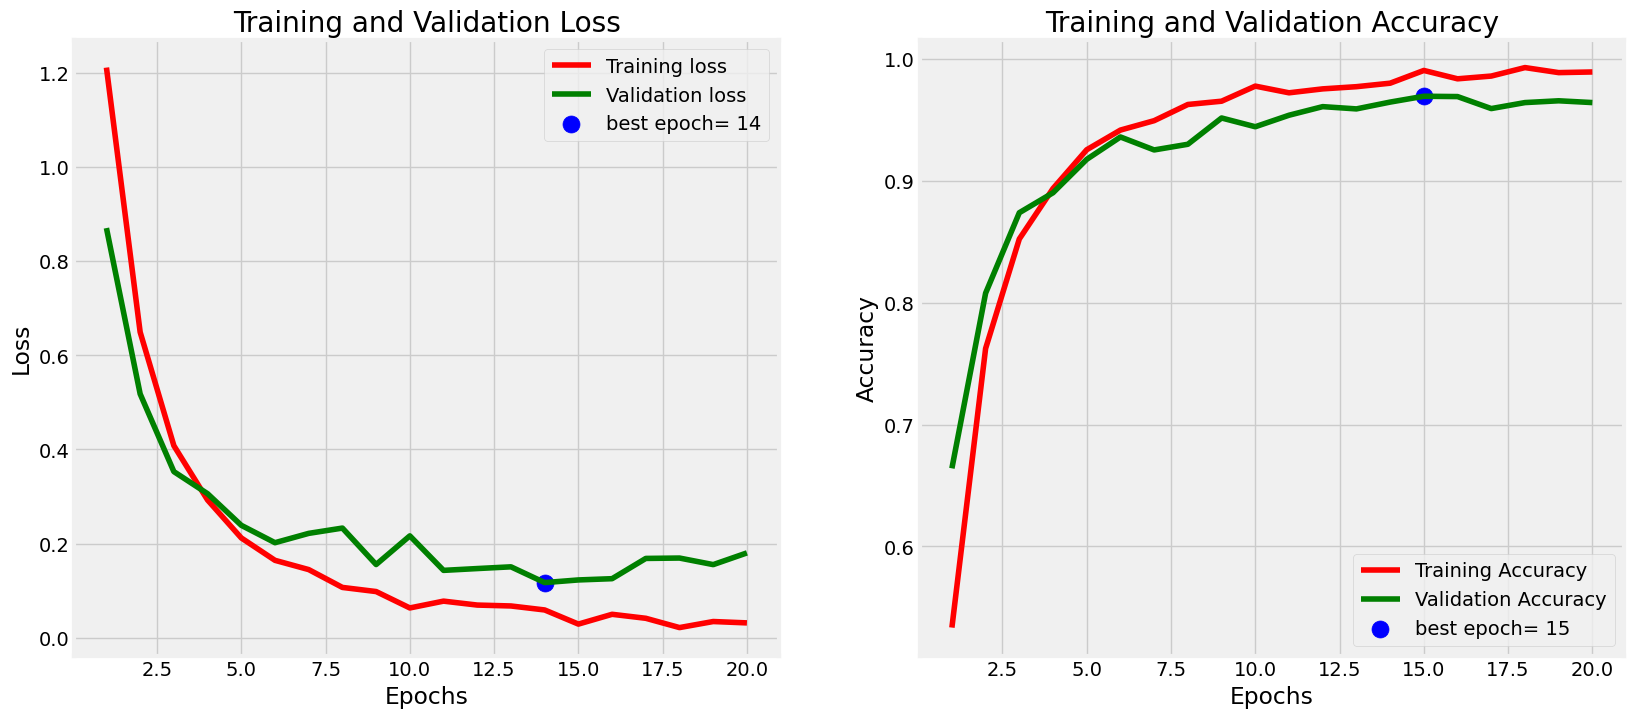

In [19]:
plot_training(history)

In [20]:
train_score = model.evaluate(X_train, Y_train, verbose= 1)
test_score = model.evaluate(X_test, Y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

2025-01-31 12:16:01.979402: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 353251584 exceeds 10% of free system memory.


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9915 - loss: 0.0269
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9617 - loss: 0.1890
Train Loss:  0.056288037449121475
Train Accuracy:  0.9864174127578735
--------------------
Test Loss:  0.18527135252952576
Test Accuracy:  0.9640992879867554


In [21]:
y_true = np.array(Y_test)
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)

# Kiểm tra xem y_true có phải là một mảng một chiều hay không
if y_true.ndim == 1:
    # Nếu y_true là một mảng một chiều, không cần sử dụng np.argmax
    pass
else:
    y_true = np.argmax(y_true, axis=1)

294/294 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


In [22]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}
classes_labels = []
for key in classes.keys():
    classes_labels.append(key)

print(classes_labels)

[4, 6, 2, 1, 5, 0, 3]


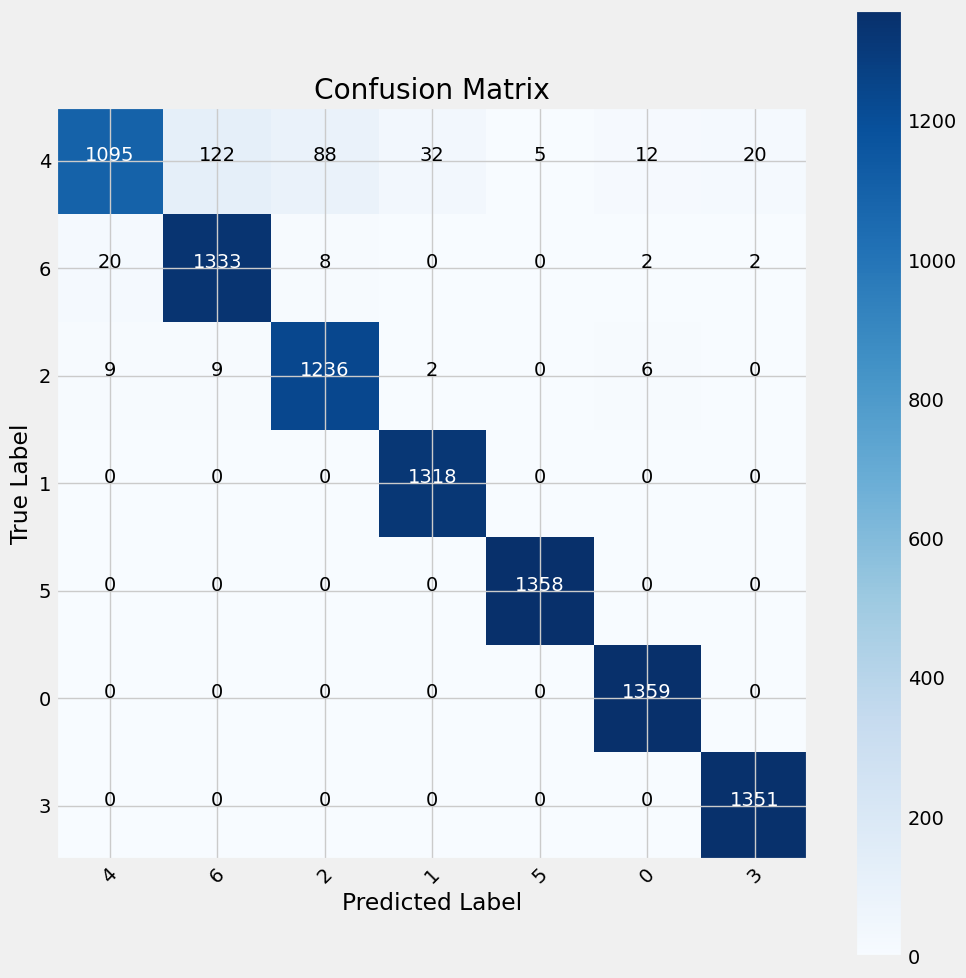

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
# Confusion matrix
cm = cm = confusion_matrix(y_true, y_pred, labels=classes_labels)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


In [25]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
import io

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the correct class labels mapping
class_labels = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']

# Load the trained model
@st.cache_resource
def load_model():
    return tf.keras.models.load_model('final_model.h5')

model = load_model()

# Load mean and std from training (you'll need to provide these)
@st.cache_resource
def load_mean_std():
    mean = np.load('mean.npy')
    std = np.load('std.npy')
    return mean, std

mean, std = load_mean_std()



# Define the image preprocessing function
def preprocess_image(image):
    image = image.resize((28, 28))
    image = np.asarray(image)
    image = (image - mean) / std
    image = np.expand_dims(image, axis=0)
    return image

# Streamlit app
st.title('Skin Lesion Predictor')

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(io.BytesIO(uploaded_file.read())).convert('RGB')
    st.image(image, caption='Uploaded Image', use_contanier_width=True)
    
    # Preprocess the image
    processed_image = preprocess_image(image)
    
    # Make prediction
    predictions = model.predict(processed_image)
    
    # Get predicted class index and name
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    predicted_class = class_labels[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx]
    
    # Display results
    st.write(f"Predicted Class: {predicted_class}")
    st.write(f"Confidence: {confidence:.2f}")
    
    # Display bar chart of all predictions
    st.bar_chart(dict(zip(class_labels, predictions[0])))

st.write("Note: This is a demo application and should not be used for medical diagnosis. Always consult with a healthcare professional.")

Overwriting app.py
